In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/데이콘/스타2/test.csv')

In [0]:
train.head()

,game_id,winner,time,player,species,event,event_contents
0,0,1,0.00,0,T,Camera,"at (145.25, 21.5078125)"
1,0,1,0.00,1,T,Camera,"at (22.75, 147.0078125)"
2,0,1,0.02,0,T,Selection,['OrbitalCommand [3080001]']
3,0,1,0.02,0,T,Ability,(1360) - TrainSCV
4,0,1,0.14,0,T,Camera,"at (142.99609375, 24.50390625)"


In [0]:
test.head()

,game_id,time,player,species,event,event_contents
0,38872,0.00,0,P,Camera,"at (22.25, 81.5078125)"
1,38872,0.00,1,P,Camera,"at (120.25, 153.83984375)"
2,38872,0.01,1,P,Selection,['Nexus [3100001]']
3,38872,0.01,1,P,Ability,(15E0) - TrainProbe
4,38872,0.01,1,P,AddToControlGroup,NaN


# EDA

## species

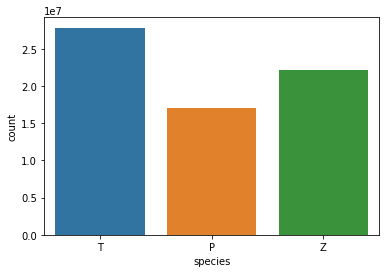

In [0]:
sns.countplot(train['species'])

## time
- ex) 2.24 : 2분 24초

각 게임의 play time 출력

In [0]:
# k=0
# for id in train['game_id']:
#   if id != train['game_id'][k+1]:
#     print(train['time'][k])
#   k+=1

## event

행동 종류
- Ability : 생산, 공격 등 선수의 주요 행동,  
- AddToControlGroup : 부대에 추가 
- Camera : 시점 선택  
- ControlGroup : 부대 행동, 
- GetControlGroup : 부대 불러오기 
- Right Click : 마우스 우클릭, 
- Selection : 객체 선택
- SetControlGroup : 부대 지정

In [0]:
#train[train['event']=='Right Click']

'DestructibleSignsFunny' 이게 뭘까??

In [0]:
dummies = pd.get_dummies(train['event'], dtype='str')

In [0]:
prac_dummies = pd.concat([train, dummies], axis=1)

In [0]:
Cam_split = prac_dummies['Camera'].str.split(", ")
Cam_split["Cam_X"] = Cam_split.str.get(0).astype(np.float32)
Cam_split["Cam_Y"] = Cam_split.str.get(1).astype(np.float32)